transformer.wte.weight torch.Size([50257, 768])
transformer.wpe.weight torch.Size([1024, 768])
transformer.h.0.ln_1.weight torch.Size([768])
transformer.h.0.ln_1.bias torch.Size([768])
transformer.h.0.attn.c_attn.weight torch.Size([768, 2304])
transformer.h.0.attn.c_attn.bias torch.Size([2304])
transformer.h.0.attn.c_proj.weight torch.Size([768, 768])
transformer.h.0.attn.c_proj.bias torch.Size([768])
transformer.h.0.ln_2.weight torch.Size([768])
transformer.h.0.ln_2.bias torch.Size([768])
transformer.h.0.mlp.c_fc.weight torch.Size([768, 3072])
transformer.h.0.mlp.c_fc.bias torch.Size([3072])
transformer.h.0.mlp.c_proj.weight torch.Size([3072, 768])
transformer.h.0.mlp.c_proj.bias torch.Size([768])
transformer.h.1.ln_1.weight torch.Size([768])
transformer.h.1.ln_1.bias torch.Size([768])
transformer.h.1.attn.c_attn.weight torch.Size([768, 2304])
transformer.h.1.attn.c_attn.bias torch.Size([2304])
transformer.h.1.attn.c_proj.weight torch.Size([768, 768])
transformer.h.1.attn.c_proj.bias 

Device set to use cuda:0
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': "Hello, I'm a language model, so that makes a lot of sense. (laughter) That's why it comes here, that's why I"},
 {'generated_text': 'Hello, I\'m a language model, my brain is a model. Maybe I should stop pretending that I understand human language and start practicing it." And'},
 {'generated_text': 'Hello, I\'m a language model, I\'m not a programmer. This is good, you understand.\n\n"But there is something that you'},
 {'generated_text': "Hello, I'm a language model, and that's why I feel so strongly about this game.\n\nI think games don't make a lot"},
 {'generated_text': 'Hello, I\'m a language model, it\'s called a macro. But I don\'t really understand them yet."\n\nWhile the program is very'}]

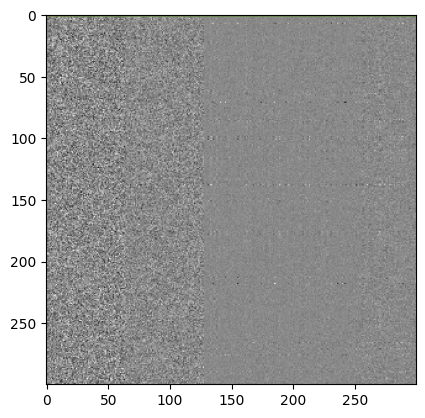

In [1]:
# install transformers if it isn't already there
# !pip install transformers # ! takes you into terminal mode
from transformers import GPT2LMHeadModel
model_hf = GPT2LMHeadModel.from_pretrained("gpt2") #124M 
sd_hf = model_hf.state_dict()

for k,v in sd_hf.items():
    print(k, v.shape)

sd_hf["transformer.wpe.weight"].view(-1)[:20]

#Install if it isn't already there
# !pip install matplotlib
import matplotlib.pyplot as plt 
plt.imshow(sd_hf["transformer.wpe.weight"], cmap="gray")

# Observe from the plot created that this model is pretty undertrained at this time
# These are parameters and trained from scratch with GPT2
plt.plot(sd_hf["transformer.wpe.weight"][:, 150])
plt.plot(sd_hf["transformer.wpe.weight"][:, 200])
plt.plot(sd_hf["transformer.wpe.weight"][:, 250])

# first layer, first block of 300 by 300
# OUT OF SCOPE: for further details look into mechanistic interpretability to understand 
# what this structure is and why. 
plt.imshow(sd_hf["transformer.h.1.attn.c_attn.weight"][:300,:300], cmap="gray")

from transformers import pipeline, set_seed
generator = pipeline('text-generation', model='gpt2')
set_seed(42)
# below we are sampling 30 token and 5 sequences
generator("Hello, I'm a language model,", max_length=30, num_return_sequences=5)
